## Scatterplot of track vs scalar

Make the scatterplot comparing track vs scalar

In [1]:
getwd()

[1] "/data/nasif12/home_if12/avsec/projects-work/code_spline_trans/Scripts/Figures"

In [2]:
setwd("../../")

In [3]:
source(".Rprofile")

Loading packages and configuration from src/r/config.R...
Done


In [4]:
source("Scripts/Figures/func/gam_vs_relu_perf.R")


Attaching package: ‘dplyr’

The following object is masked from ‘package:AnnotationDbi’:

    select

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union

The following object is masked from ‘package:XVector’:

    slice

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:nlme’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The fol

In [5]:
# re-cache everything
df = get_eCLIP_metric(n_cores=8, incl_track=TRUE)

In [6]:
df[, Method := gsub("DeepNN_track_position_ext_gam", "track_gam", Method)]

In [7]:
dtc <- df[metric=="auprc" & task == "eCLIP"][, .(Method, subtask, value)][, id := 1:.N, by = .(Method, subtask)] %>% spread(Method, value)

In [8]:
df %>% head

task,subtask,Method,pos_as_track,exp,metric,value
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7884387
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7592393
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7464089
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7494649
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7750127
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7378954


In [9]:
df %>% head

task,subtask,Method,pos_as_track,exp,metric,value
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7884387
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7592393
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7464089
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7494649
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7750127
eCLIP,AARS,no_pos,FALSE,DeepNN_ext,auc,0.7378954


In [14]:
df[, .N, by = .(task, Method, pos_as_track, exp)]

task,Method,pos_as_track,exp,N
eCLIP,no_pos,FALSE,DeepNN_ext,44800
eCLIP,gam,FALSE,DeepNN_scalar_position_ext_gam,44800
eCLIP,relu,FALSE,DeepNN_scalar_position_ext_relu,44800
eCLIP,track_gam,TRUE,DeepNN_track_position_ext_gam,44800


In [20]:
write_csv(df, "tmp.csv")

In [18]:
dtct = dcast(df, ...~ Method, value.var = "value")

Aggregate function missing, defaulting to 'length'


In [25]:
# overall not significant
dtct[, wilcox.test(track_gam, gam, paired=TRUE)]
# p.value = 0.91
# 
dtct[, mean(track_gam - gam)]
# 0.0014 -> average absolute dviation 
dtct[, mean((track_gam - gam)/gam)]
# 0.2% relative deviation


	Wilcoxon signed rank test with continuity correction

data:  track_gam and gam
V = 50288, p-value = 1
alternative hypothesis: true location shift is not equal to 0


[1] 0

[1] NaN

In [26]:
dtct[, .N, by = .(signif.gam__track_gam, sign(track_gam - gam))]

ERROR: Error in eval(bysub, x, parent.frame()): object 'signif.gam__track_gam' not found


In [27]:
# In Total: 43 significantly better using track and 15 significantly worse

In [28]:
dtct <- dtc[, .(gam = mean(gam), 
              relu=mean(relu), 
              no_pos=mean(no_pos),
              track_gam=mean(track_gam),
              p.gam__relu = wilcox.test(gam, relu)$p.value,
              p.gam__track_gam = wilcox.test(gam, track_gam)$p.value,
              p.gam__no_pos = wilcox.test(gam, no_pos)$p.value
              ), by = .(subtask)]

In [29]:
signif_threshold <- 1e-4

In [30]:
dtct[, signif.gam__relu := p.adjust(p.gam__relu, method="bonferroni") < signif_threshold]
dtct[, signif.gam__no_pos:= p.adjust(p.gam__no_pos, method="bonferroni") < signif_threshold]
dtct[, signif.gam__track_gam:= p.adjust(p.gam__track_gam, method="bonferroni") < signif_threshold]
dtct %>% head

subtask,gam,relu,no_pos,track_gam,p.gam__relu,p.gam__track_gam,p.gam__no_pos,signif.gam__relu,signif.gam__no_pos,signif.gam__track_gam
AARS,0.6212842,0.5183930,0.4740540,0.5710210,5.572417e-63,8.815291e-36,6.620091e-67,TRUE,TRUE,TRUE
AGGF1,0.7911967,0.7746943,0.6861069,0.7878016,5.742528e-44,1.200728e-04,4.830856e-67,TRUE,TRUE,FALSE
AKAP8L,0.7225794,0.6961368,0.6647773,0.7345498,3.740603e-34,2.043366e-11,4.158183e-65,TRUE,TRUE,TRUE
AUH,0.7433043,0.6993373,0.6370448,0.7496658,3.306504e-59,2.446475e-04,4.830856e-67,TRUE,TRUE,FALSE
BCCIP,0.8443194,0.8159724,0.8073794,0.8463252,1.251558e-60,8.341838e-02,2.513869e-65,TRUE,TRUE,FALSE
BUD13,0.8983075,0.8832179,0.7325109,0.9018438,4.419525e-66,8.681788e-18,4.830856e-67,TRUE,TRUE,TRUE


In [32]:
plt_dir <- "data/plots/"
dir.create(plt_dir, showWarnings = FALSE)
library(cowplot)
source("Scripts/Figures/config.R")

In [35]:
dtct[, add_label := rank(-abs(gam - track_gam)) < 5]

Warning message:
“Removed 1 rows containing missing values (geom_point).”

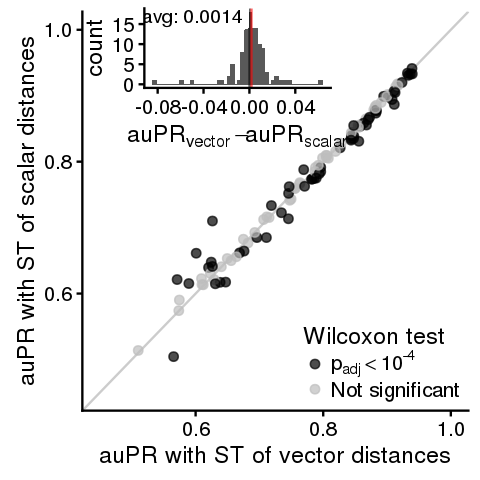

In [167]:
library("gridExtra")
library(grid)

plt_combined<- plt_test_gam_Why ChIP-seq data is not the ‘absolute truth’ about where and how strongly TFs bind in vivo, and what can we do about it?vs_relu + annotation_custom(ggplotGrob(hist_plt), xmin = 0.4,xmax = 0.83, ymin = 0.795, ymax=1.05)
plt_combined
#ggdraw() + draw_plot(plt_test_gam_vs_relu, 0, 0, 1, 1) + draw_plot(hist_plt, 0.15, 0.6, 0.5, 0.4, scale=1)

In [154]:
plt_dir <- "data/plots/"

In [168]:
save_plot_mul(file.path(plt_dir, "eCLIP_scalar_vs_vector"), c("pdf", "png"), plt_combined)

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”